In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [66]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [67]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [68]:
data.drop("id",axis=1,inplace=True)

In [69]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [70]:
# data plot function
def plot_bar(temp1):
    for temp in temp1:
        data_temp=data[[temp,'stroke']].groupby([temp] , as_index=False).mean().sort_values(by='stroke', ascending=False)
        %matplotlib inline
        plt.bar(data_temp.eval(temp),data_temp.stroke)
        plt.ylabel('stroke')
        plt.xlabel(temp)
        plt.subplot()
        plt.show()
    
    

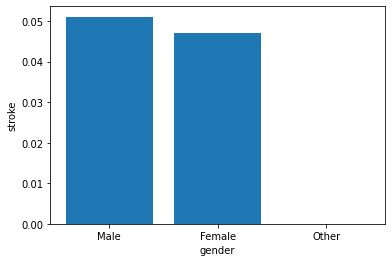

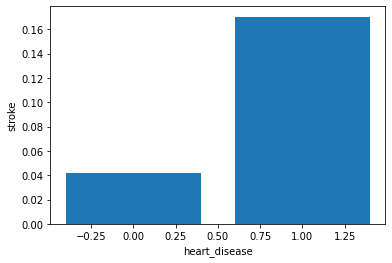

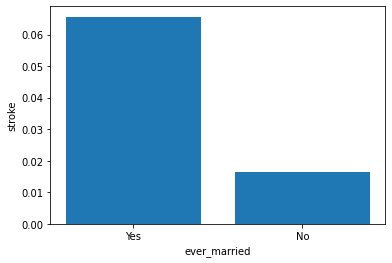

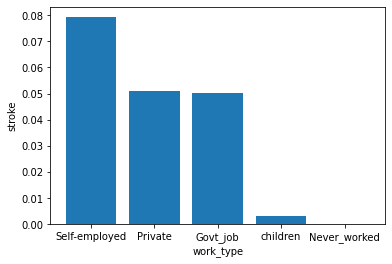

In [71]:
plot_bar(['gender','heart_disease','ever_married','work_type'])

In [72]:
categorical = (data.dtypes == "object")
categorical_list = list(categorical[categorical].index)
print(categorical_list)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [73]:
gender_encode=LabelEncoder()
married_encode=LabelEncoder()
work_type_encode=LabelEncoder()
Residence_type_encode=LabelEncoder()
smoking_status_encode=LabelEncoder()
data['gender']=gender_encode.fit_transform(data['gender'])
data['ever_married']=married_encode.fit_transform(data['ever_married'])
data['work_type']=work_type_encode.fit_transform(data['work_type'])
data['Residence_type']=Residence_type_encode.fit_transform(data['Residence_type'])
data['smoking_status']=smoking_status_encode.fit_transform(data['smoking_status'])

In [74]:
# married_mapping = {'No': 0, 'Yes': 1}
# data['ever_married'] = data['ever_married'].map(married_mapping)
# Residence_mapping = {'Rural': 0, 'Urban': 1}
# data['Residence_type'] = data['Residence_type'].map(Residence_mapping)
# data['gender'] = pd.Categorical(data['gender'])
# gender_encode = pd.get_dummies(data['gender'], prefix = 'encoded')
# data['work_type'] = pd.Categorical(data['work_type'])
# work_encode = pd.get_dummies(data['work_type'], prefix = 'encoded')
# data['smoking_status'] = pd.Categorical(data['smoking_status'])
# smoking_status_encode = pd.get_dummies(data['smoking_status'], prefix = 'encoded')
# onehotencoder = OneHotEncoder()
# data.drop("gender", axis=1, inplace=True)
# data.drop("work_type", axis=1, inplace=True)
# data.drop("smoking_status", axis=1, inplace=True)
# data = pd.concat([data, smoking_status_encode], axis=1)
# data = pd.concat([data, work_encode], axis=1)
# data = pd.concat([data, gender_encode], axis=1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


<AxesSubplot:>

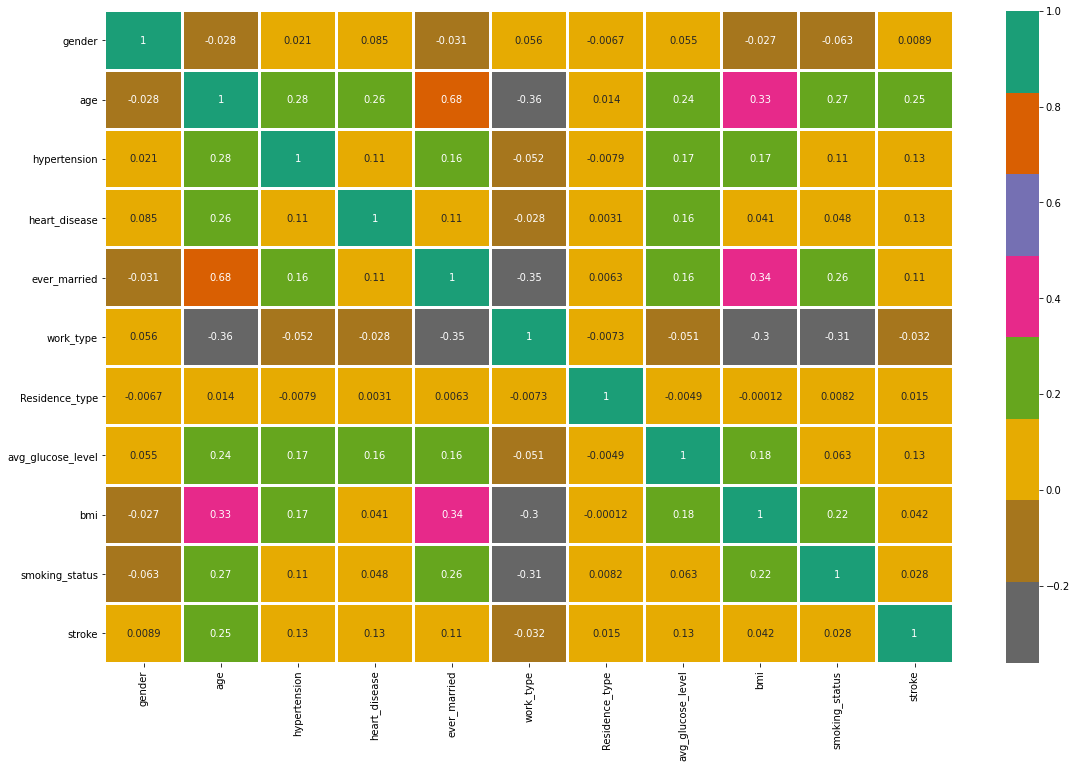

In [75]:
plt.figure(figsize=(19,12)) 
sns.heatmap(data.corr(), annot=True, cmap='Dark2_r', linewidths = 2)

In [76]:
# def plot_pie(temp1):
#     for temp in temp1:
#         labels =temp.value_counts(sort = True).index
#         sizes = temp.value_counts(sort = True)
#         plt.figure(figsize=(7,7))
#         plt.pie(sizes,  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,)
#         plt.title('Number of stroke in the dataset')
#         plt.show()
# plot_pie(data['ever_married'])

In [77]:
def give_unique(temp):
    print(temp, data[temp].unique())

In [78]:
for i in range(len(categorical_list)):
    give_unique(categorical_list[i])
    

gender [1 0 2]
ever_married [1 0]
work_type [2 3 0 4 1]
Residence_type [1 0]
smoking_status [1 2 3 0]


In [79]:
data['bmi'] = data['bmi'].fillna(0)

In [80]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,0.0,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,0.0,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [81]:
data1=data[data['bmi']!=0]
data2=data[data['bmi']==0]
temp1_Y=data1['bmi']
temp1_X=data1.drop(['bmi'] , axis=1)
temp2_Y=data2['bmi']
temp2_X=data2.drop(['bmi'] , axis=1)

sk=StandardScaler()
temp1_X = sk.fit_transform(temp1_X)
temp2_X = sk.transform(temp2_X)

from sklearn.ensemble import RandomForestRegressor
mod=RandomForestRegressor()

mod.fit(temp1_X,temp1_Y)
pred=mod.predict(temp2_X)

k=0
for i in range(len(data['bmi'])):
    if(data['bmi'][i]==0.0):
        data['bmi'][i]=pred[k]
        k=k+1

In [82]:
data['age'] = data['age'].apply(lambda x : round(x))

In [83]:
Y = data["stroke"]
X=data.drop(['stroke'] , axis=1)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3) 

In [86]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2804,0,69,0,0,1,0,0,70.98,30.0,0
1054,0,76,0,0,0,3,1,77.52,40.9,1
3549,0,80,1,0,1,2,1,125.89,28.9,3
1678,0,79,0,0,1,3,1,80.57,23.8,2
2209,1,78,1,0,1,3,0,75.19,27.6,2
...,...,...,...,...,...,...,...,...,...,...
789,0,54,0,0,1,2,0,111.41,31.1,2
968,0,55,0,0,1,2,0,112.47,32.8,3
1667,0,40,0,0,1,2,0,191.48,27.9,3
3321,1,2,0,0,0,4,1,81.42,13.5,0


In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [88]:
# evaluating function

In [89]:
class evaluate_all_model:
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.naive_bayes import CategoricalNB
    from sklearn.cluster import KMeans
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.preprocessing import StandardScaler
    from xgboost import XGBClassifier
    import time
    def __init__(self,x,y):
        self.x=x
        self.y=y
        self.train_test_split()
        self.define_models()
        self.evaluate_model()
        print("best model base on Accuracy")
        print(self.best_model)
        
    def train_test_split(self):
        self.X_train, self.X_test, self.y_train,self.y_test =train_test_split(self.x, self.y,test_size=0.33, random_state=3)
        sc=StandardScaler()
        self.X_train = sc.fit_transform(self.X_train)
        self.X_test = sc.transform(self.X_test)
    def define_models(self):
        self.models={'LogisticRegression': self.LogisticRegression(),
    'RandomForestClassifier': self.RandomForestClassifier(),
     'KNeighborsClassifier': self.KNeighborsClassifier(),
    'DecisionTreeClassifier': self.DecisionTreeClassifier(),
    'SupportVectorMachine':self.SVC(),
    'GaussianNB': self.GaussianNB(),
    'BernoulliNB': self.BernoulliNB(),
    'GradientBoostingClassifier': self.GradientBoostingClassifier()
                    }
        
        self.modelNames =['LogisticRegression', 'RandomForestClassifier','KNeighborsClassifier','DecisionTreeClassifier','SupportVectorMachine',
                         'GaussianNB','BernoulliNB','GradientBoostingClassifier']
        self.trainScores = []
        self.testScores = []
        self.Time_taken=[]
        self.best_model_score=0
        self.best_model={}
        self.less_time=123
        
        
    def evaluate_model(self):
        for i in self.models:
            start = self.time.time()
            
            model=self.models[i]
            model.fit(self.X_train,self.y_train)
            train_score = model.score(self.X_train, self.y_train)
            self.trainScores.append(train_score)
            print(f'Model:- {i}')
            print(f'training score:- {train_score}')
            test_score = model.score(self.X_test, self.y_test)
            self.testScores.append(test_score)
            print(f'test Score:- {test_score}')
            
            y_predictions = model.predict(self.X_test)
            conf_matrix = confusion_matrix(y_predictions, self.y_test)
            print(f'Confussion Matrix: \n{conf_matrix}\n')
            
            tn = conf_matrix[0,0]
            fp = conf_matrix[0,1]
            tp = conf_matrix[1,1]
            fn = conf_matrix[1,0]
            accuracy  = (tp + tn) / (tp + fp + tn + fn)
            precision = tp / (tp + fp)
            recall    = tp / (tp + fn)
            f1score  = 2 * precision * recall / (precision + recall)
            specificity = tn / (tn + fp)
            print(f'Accuracy : {accuracy}')
            print(f'Precision: {precision}')
            print(f'Recall   : {recall}')
            print(f'F1 score : {f1score}')
            print(f'Specificity : {specificity}')

            end = self.time.time()
            time_taken=end-start
            self.Time_taken.append(time_taken)
            print(f'Time required {end-start}')
            print("***************************************************************************")
            print("____________________________________________________________________________")
            print("\n\n\n")
            if(float(test_score)>self.best_model_score):
                self.best_model["model Name"]=i
                self.best_model["Time Required on train and test"]=time_taken
                self.best_model["Accuracy on train data"]=train_score
                self.best_model["Accuracy on test data"]=accuracy
                self.best_model_score=test_score
                
            if(time_taken<self.less_time):
                self.less_time=time_taken
    def plot_bar(self):
        plt.bar(np.arange(len(self.trainScores)), self.trainScores, color='blue', width=0.25, edgecolor='white', label='train')
        plt.bar([x + 0.25 for x in np.arange(len(self.trainScores))], self.testScores, color='red', width=0.25, edgecolor='white', label='Test')
        plt.xlabel('Models', fontweight='bold', size = 24)
        plt.ylabel('Scores', fontweight='bold', size = 24)
        plt.xticks([r-0.25 for r in range(len(self.trainScores))], self.modelNames, rotation = 60)
        plt.legend()
        plt.show()
    def get_data(self):
        self.temp_dict={}
        self.temp_dict["Model"]=self.modelNames
        self.temp_dict["Training Score"]=self.trainScores
        self.temp_dict["Accuracy on Test"]=self.testScores
        self.temp_dict["Time Taken"]=self.Time_taken
        return self.temp_dict   
    def get_dataframe(self):
        return pd.DataFrame.from_dict(at.get_data()) 
            
        
    

In [90]:
at=evaluate_all_model(X,Y)

Model:- LogisticRegression
training score:- 0.9503359626059013
test Score:- 0.9531713100177831
Confussion Matrix: 
[[1608   79]
 [   0    0]]

Accuracy : 0.9531713100177831
Precision: 0.0
Recall   : nan
F1 score : nan
Specificity : 0.9531713100177831
Time required 0.05269813537597656
***************************************************************************
____________________________________________________________________________




Model:- RandomForestClassifier
training score:- 1.0
test Score:- 0.951985773562537
Confussion Matrix: 
[[1606   79]
 [   2    0]]

Accuracy : 0.951985773562537
Precision: 0.0
Recall   : 0.0
F1 score : nan
Specificity : 0.9531157270029673
Time required 1.2049391269683838
***************************************************************************
____________________________________________________________________________




Model:- KNeighborsClassifier
training score:- 0.95325737657026
test Score:- 0.950800237107291
Confussion Matrix: 
[[1604   79]
 [ 

In [91]:
at.get_dataframe()

,Model,Training Score,Accuracy on Test,Time Taken
0,LogisticRegression,0.950336,0.953171,0.052698
1,RandomForestClassifier,1.000000,0.951986,1.204939
2,KNeighborsClassifier,0.953257,0.950800,1.098491
3,DecisionTreeClassifier,1.000000,0.915827,0.041760
4,SupportVectorMachine,0.951212,0.953171,1.583892
5,GaussianNB,0.868829,0.859514,0.025084
6,BernoulliNB,0.945077,0.945465,0.017614
7,GradientBoostingClassifier,0.960853,0.952579,1.079693


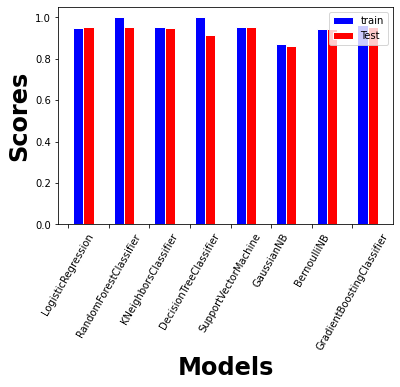

In [92]:
at.plot_bar()

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=3)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9562948467058056

In [96]:
import pickle
pickle.dump(lr, open('Stroke_model', 'wb'))
pickle.dump(sc, open('Stroke_StandardScaler', 'wb'))

In [30]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600,1,1
1,0,61,0,0,1,3,0,202.21,35.377,2,1
2,1,80,0,1,1,2,0,105.92,32.500,2,1
3,0,49,0,0,1,2,1,171.23,34.400,3,1
4,0,79,1,0,1,3,0,174.12,24.000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,2,1,83.75,26.111,2,0
5106,0,81,0,0,1,3,1,125.20,40.000,2,0
5107,0,35,0,0,1,3,0,82.99,30.600,2,0
5108,1,51,0,0,1,2,0,166.29,25.600,1,0


In [31]:
items=data.columns
items

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [95]:
data.iloc[0].values

array([  1.  ,  67.  ,   0.  ,   1.  ,   1.  ,   2.  ,   1.  , 228.69,
        36.6 ,   1.  ,   1.  ])

In [34]:
max=[]
for i in items:
    max.append(data[i].describe()['min'])
max

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 55.12, 10.3, 0.0, 0.0]

In [35]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.962775,1.376908,0.048728
std,0.493044,22.612731,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.777574,1.071534,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.200000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [48]:
data['smoking_status'].value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [50]:
data2['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64